In [140]:
# https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
tsla_training_complete = pd.read_csv(r'./data/TSLA_5Y.csv')
tsla_training_processed_complete = tsla_training_complete.iloc[:, 1:2].values


In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
LOOK_BACK = 60

tsla_training_scaled_complete = scaler.fit_transform(tsla_training_processed_complete)

train_size = int(len(tsla_training_processed_complete) * 0.8)
test_size = len(tsla_training_processed_complete) - train_size + LOOK_BACK

tsla_training_processed, tsla_testing_processed  = tsla_training_processed_complete[0:train_size], tsla_training_processed_complete[train_size:len(tsla_training_processed_complete)]

tsla_training_scaled, tsla_testing_scaled = tsla_training_scaled_complete[0:train_size], tsla_training_scaled_complete[train_size:len(tsla_training_processed_complete)]
print(len(tsla_training_processed), len(tsla_testing_processed), test_size)

1007 252 312


In [144]:
#print(tsla_training_scaled[-5:])
len(tsla_training_scaled)

1007

In [145]:
features_set = []
labels = []


for i in range(LOOK_BACK, len(tsla_training_scaled)):
    features_set.append(tsla_training_scaled[i-LOOK_BACK:i, 0])
    labels.append(tsla_training_scaled[i, 0])

features_set, labels = np.array(features_set), np.array(labels)

#In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. 
# We need to convert our data into three-dimensional format. 
# The first dimension is the number of records or rows in the dataset 
# The second dimension is the number of time steps which is 60
# The last dimension is the number of indicators. Since we are only using one feature, i.e Open, 
# the number of indicators will be one

# reshape to [samples, time_steps, n_features]

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
print(features_set.shape)

(947, 60, 1)


# Training The LSTM

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [147]:
model = Sequential()

In [148]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [149]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [150]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Train on 947 samples
Epoch 1/100
947/947 [==============================] - 17s 18ms/sample - loss: 0.0059
Epoch 2/100
947/947 [==============================] - 8s 9ms/sample - loss: 0.0014
Epoch 3/100
947/947 [==============================] - 9s 10ms/sample - loss: 0.0012
Epoch 4/100
947/947 [==============================] - 9s 9ms/sample - loss: 0.0012
Epoch 5/100
947/947 [==============================] - 9s 9ms/sample - loss: 0.0011
Epoch 6/100
947/947 [==============================] - 9s 9ms/sample - loss: 0.0011
Epoch 7/100
947/947 [==============================] - 9s 9ms/sample - loss: 0.0012
Epoch 8/100
947/947 [==============================] - 9s 9ms/sample - loss: 0.0010
Epoch 9/100
947/947 [==============================] - 8s 9ms/sample - loss: 9.6004e-04
Epoch 10/100
947/947 [==============================] - 8s 9ms/sample - loss: 9.0681e-04
Epoch 11/100
947/947 [==============================] - 9s 9ms/sample - loss: 8.5717e-04
Epoch 12/100
947/947 [================

# Testing

In [167]:
test_features = []
test_labels = []
LOOK_BACK = 60

for i in range(LOOK_BACK, len(tsla_testing_scaled)):
    test_features.append(tsla_testing_scaled[i-LOOK_BACK:i, 0])
    test_labels.append(tsla_testing_scaled[i, 0])

test_features, test_labels = np.array(test_features), np.array(test_labels)

#In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. 
# We need to convert our data into three-dimensional format. 
# The first dimension is the number of records or rows in the dataset 
# The second dimension is the number of time steps which is 60
# The last dimension is the number of indicators. Since we are only using one feature, i.e Open, 
# the number of indicators will be one

# reshape to [samples, time_steps, n_features]

test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
print(test_features.shape)

(192, 60, 1)


In [168]:
predictions = model.predict(test_features)

In [169]:
predictions = scaler.inverse_transform(predictions)

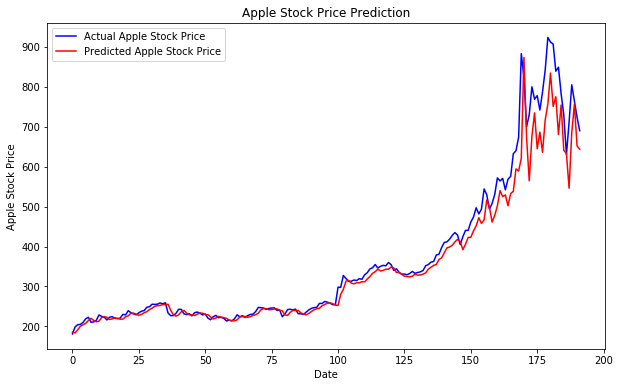

In [171]:
plt.figure(figsize=(10,6))
plt.plot(tsla_testing_processed[LOOK_BACK:], color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()